<a href="https://colab.research.google.com/github/WahyuKhairi06/VisualisasiData_WahyuKhairi/blob/main/KomentarInstagram/Komentar_Instagram_Cyberbullying.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [ ]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from collections import Counter
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from itertools import islice
from wordcloud import STOPWORDS


# **Membaca Dataset**

In [ ]:
data = pd.read_csv("/content/dataset_komentar_instagram_cyberbullying.csv")
data.head(10)

,Id,Sentiment,Instagram Comment Text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."
5,6,negative,"Pantesan di tinggalin laki, ya lakinya juga mi..."
6,7,negative,kebiasaan balajaer nyampah d ig para artis..su...
7,8,negative,krn sebagian besar rakyat indonesia itu bodoh....
8,9,negative,ayu janda bego pny suami kpn nikah laginya?
9,10,negative,"Anyiennnnggg.. Suaranya ancur banget, lebih me..."


# **Melihat dan Membaca Informasi yang dimiliki dataset**

In [ ]:
# Cek info dataset
print(data.info())

# Cek jumlah kategori unik pada kolom 'Sentiment'
unique_categories = data["Sentiment"].unique()
num_unique_categories = len(unique_categories)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      400 non-null    int64 
 1   Sentiment               400 non-null    object
 2   Instagram Comment Text  400 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.5+ KB
None
Jumlah kategori unik pada kolom 'Sentiment': 2
Kategori unik: ['negative' 'positive']


# **Melihat Categori unik dataset yang dimiliki**

In [ ]:
print(f"Jumlah kategori unik pada kolom 'Sentiment': {num_unique_categories}")
print(f"Kategori unik: {unique_categories}")


Jumlah kategori unik pada kolom 'Sentiment': 2
Kategori unik: ['negative' 'positive']


# **Melihat Data Yang NULL atau kosong**

In [ ]:
data.isnull().sum()

,0
Id,0
Sentiment,0
Instagram Comment Text,0


# **Merapikan text komentar**

In [ ]:
def clean_text(text):
    text = re.sub(r'<USERNAME>', '', text)  # Menghapus tag <USERNAME>
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Menghapus angka dan simbol
    text = text.lower()  # Konversi ke huruf kecil
    return text

# Terapkan fungsi pada kolom komentar
data["Cleaned Comment"] = data["Instagram Comment Text"].astype(str).apply(clean_text)

# Tampilkan hasil pembersihan teks
data[["Instagram Comment Text", "Cleaned Comment"]].head()

,Instagram Comment Text,Cleaned Comment
0,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,tolol gak ada hubungan nya keguguran dgn pak...
1,Geblek lo tata...cowo bgt dibela2in balikan......,geblek lo tatacowo bgt dibelain balikanhadewwn...
2,Kmrn termewek2 skr lengket lg duhhh kok labil ...,kmrn termewek skr lengket lg duhhh kok labil b...
3,"Intinya kalau kesel dengan ATT nya, gausah ke ...",intinya kalau kesel dengan att nya gausah ke a...
4,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",hadewwwww permpuan itu lgsakit jiwaknp harus d...


Fungsi untuk membersihkan teks komentar (menghapus username, simbol, dan karakter khusus)

# **1. Visual data Bar chart**

<ipython-input-15-377778bc5e09>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["Sentiment"], palette="Set2")


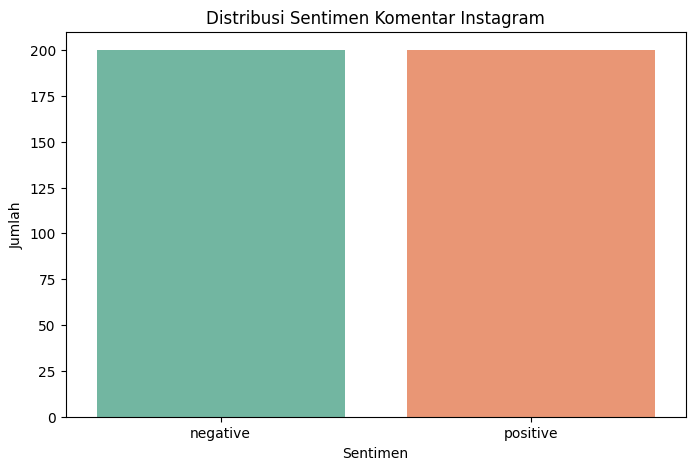

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=data["Sentiment"], palette="Set2")
plt.title("Distribusi Sentimen Komentar Instagram")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")
plt.show()


Menampilkan Distribusi data berdasarkan kolom Sentimen

# **2. Pie Chart**

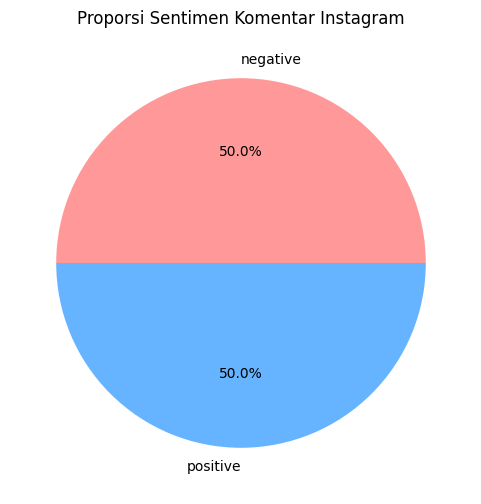

In [ ]:
plt.figure(figsize=(6,6))
data["Sentiment"].value_counts().plot.pie(autopct="%1.1f%%", colors=["#ff9999","#66b3ff","#99ff99"])
plt.title("Proporsi Sentimen Komentar Instagram")
plt.ylabel("")
plt.show()


Menampilkan data berdasarkan Proporsi Sentimen

# **3. Word Cloud**

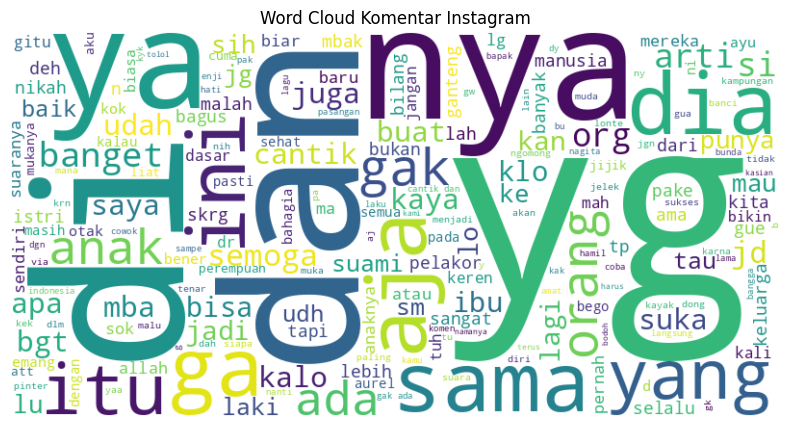

In [ ]:
text = " ".join(data["Cleaned Comment"].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud Komentar Instagram")
plt.show()


Menampilkan Kata Kata yang sering muncul

# **4. Histogram**

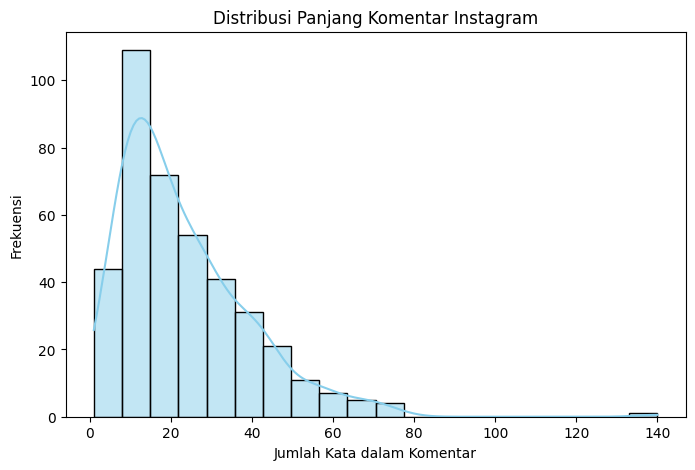

In [ ]:
# Hitung panjang setiap komentar
data["Comment Length"] = data["Cleaned Comment"].apply(lambda x: len(x.split()))

# Visualisasi histogram panjang komentar
plt.figure(figsize=(8,5))
sns.histplot(data["Comment Length"], bins=20, kde=True, color="skyblue")
plt.title("Distribusi Panjang Komentar Instagram")
plt.xlabel("Jumlah Kata dalam Komentar")
plt.ylabel("Frekuensi")
plt.show()


menampilkan jumlah kata atau Panjang Komentar